In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('oasis_longitudinal.csv')

In [3]:
df.head(6)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


# Dataset Description

In [4]:
description = pd.DataFrame({'Columns':['Subject ID','MRI ID','Group','Visit','MR Delay','M/F','Hand','EDUC','SES','MMSE',
                                       'CDR','eTIV','nWBV','ASF'],
                           'description':['Subject identification','MRI identification','Class','Visit followup','MR contrast',
                                          'Gender','Dominant hand','Years of Education','Socioeconomic Status',
                                          'Mini Mental State Examination',
                                          'Clinical Dementia Rating','Estimated Total Intracranial Volume',
                                          'Normalize Whole Brain Volume',
                                          'Atlas Scaling Factor']})

In [5]:
description

,Columns,description
0,Subject ID,Subject identification
1,MRI ID,MRI identification
2,Group,Class
3,Visit,Visit followup
4,MR Delay,MR contrast
5,M/F,Gender
6,Hand,Dominant hand
7,EDUC,Years of Education
8,SES,Socioeconomic Status
9,MMSE,Mini Mental State Examination


# Exploratory Data Analysis

In [6]:
df.shape

(373, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


### Summary of Numerical Columns

In [8]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


### Summary of Categorical columns

In [9]:
df.describe(include=[np.object])

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0048,OAS2_0165_MR1,Nondemented,F,R
freq,5,1,190,213,373


### Check missing values in the dataset

In [10]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

### Deal will missing values

In [11]:
df['SES'].skew(axis = 0, skipna = True) 

0.2215018695957971

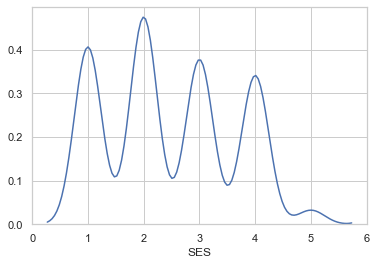

In [12]:
sns.distplot(df['SES'],hist=False)

In [13]:
df['SES'].describe()

count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

**As SES has values of integer type so we cannot impute float value of mean**
**but we can impute median in place as both median and mean have very close**
**values and median in this case is most representative value of SES.**

In [14]:
df['MMSE'].skew(axis = 0, skipna = True) 

-2.366086132004125

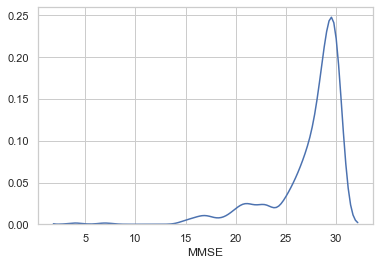

In [15]:
sns.distplot(df['MMSE'],hist=False)

In [16]:
df['MMSE'].describe()

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

**MMSE also has integer values so we cannot impute float. So we will impute it with median value**

In [17]:
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].median(), inplace=True)

In [18]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

# Data Visualisation for insights

In [19]:
def pie(var):
    plt.figure(figsize=(14,7))
    plt.subplot(121)
    label_list = df[var].unique().tolist()
    df[var].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),
                                         startangle = 60,labels=label_list,wedgeprops={"linewidth":2,"edgecolor":"k"},
                                         shadow =True)
    plt.title("Distribution of "+ var +"  variable")

    plt.subplot(122)
    ax = df[var].value_counts().plot(kind="barh")

    for i,j in enumerate(df[var].value_counts().values):
        ax.text(.7,i,j,weight = "bold",fontsize=20)

    plt.title("Count of "+ var +" cases")
    plt.show()

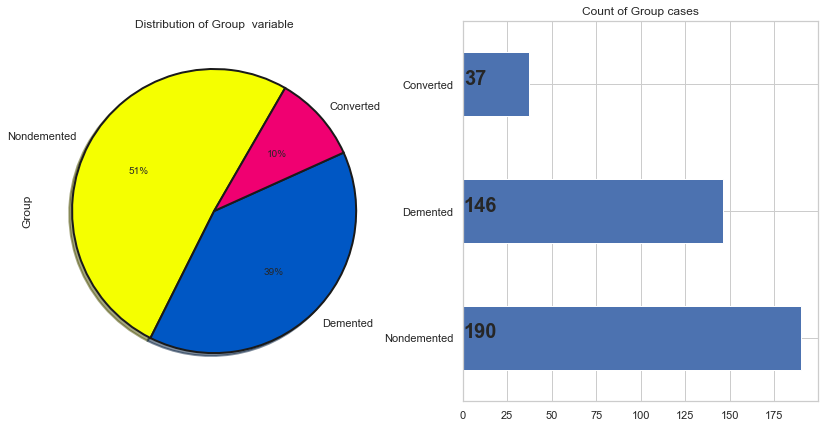

In [20]:
pie('Group')

**As we can see from the above plot, there are around 39% demented cases in the dataset i.e., majority of the data is of Non Demented cases at 51% while 10% of the data is of Converted.**

## About MMSE

#### Any score of 24 or more (out of 30) indicates a normal cognition.
#### Below this, scores can indicate severe (≤9 points), 
#### moderate (10–18 points) or mild (19–23 points) cognitive impairment.

In [21]:
def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9:
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:                                        # As we have no cases of sever dementia CDR score=3
        return 'Mild'

df['MMSE_NEW'] = df['MMSE'].apply(lambda x: cat_MMSE(x))

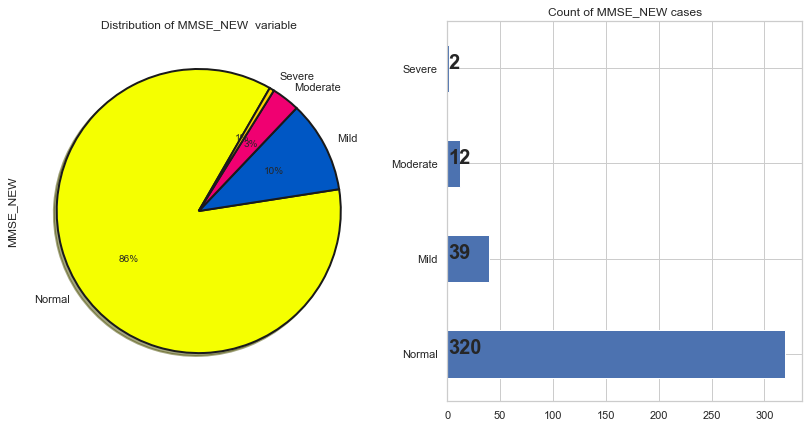

In [22]:
pie('MMSE_NEW')

**There are majority of cases of normal cognitive impairment whereas very few cases of Mild,**
**Moderate and Severe cognitive Impairment.**

In [23]:
def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'

df['CDR_NEW'] = df['CDR'].apply(lambda x: cat_CDR(x))

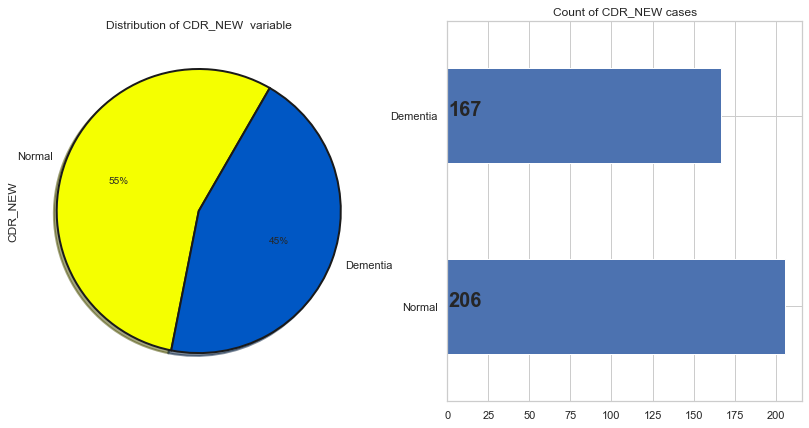

In [24]:
pie('CDR_NEW')

**we can see majority of the cases are Normal while few cases are of Mild and Moderate dementia.**

# Bivariate analysis

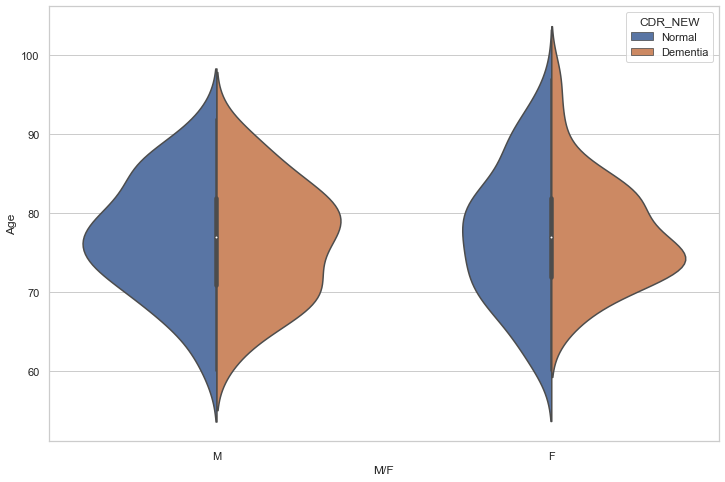

In [25]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="Age",hue="CDR_NEW",split=True, data=df)
plt.show()

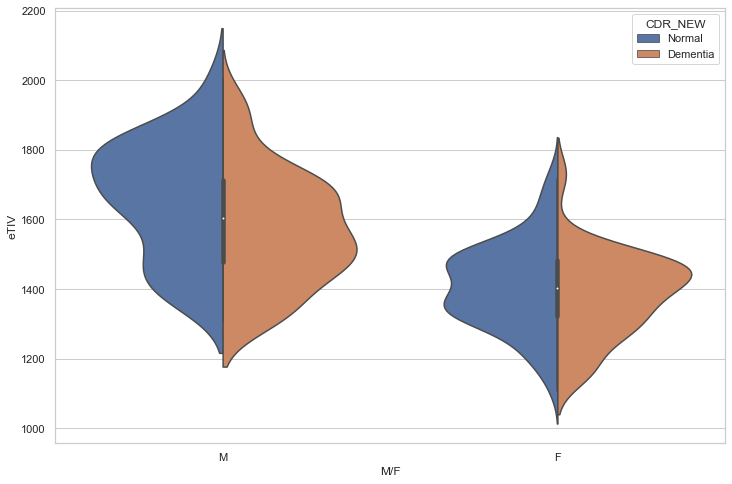

In [26]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="eTIV",hue="CDR_NEW",split=True, data=df)
plt.show()

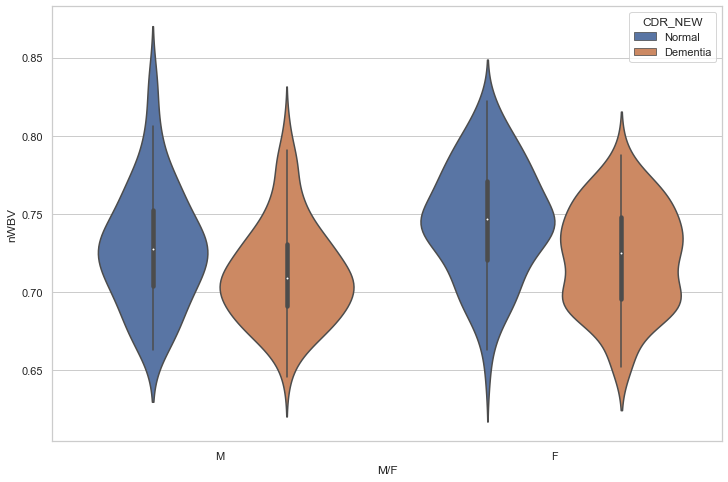

In [27]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="nWBV",hue="CDR_NEW", data=df)
plt.show()

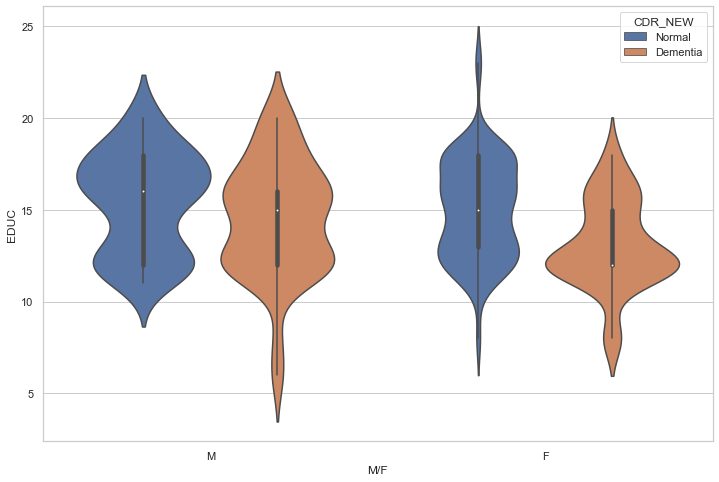

In [28]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="EDUC",hue="CDR_NEW", data=df)
plt.show()

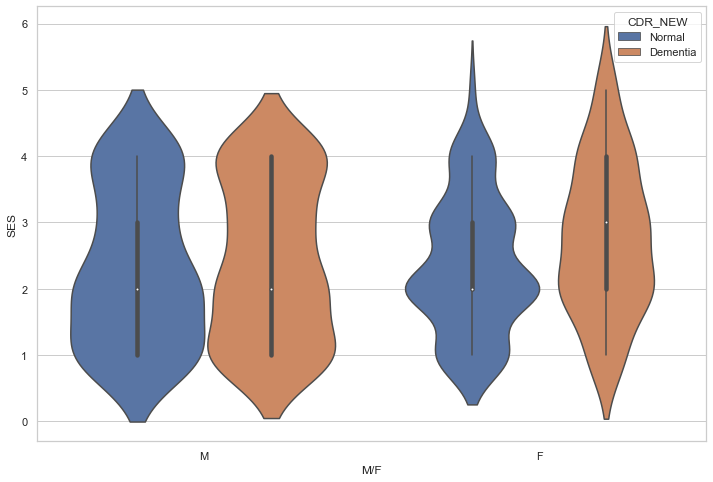

In [29]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="SES",hue="CDR_NEW", data=df)
plt.show()

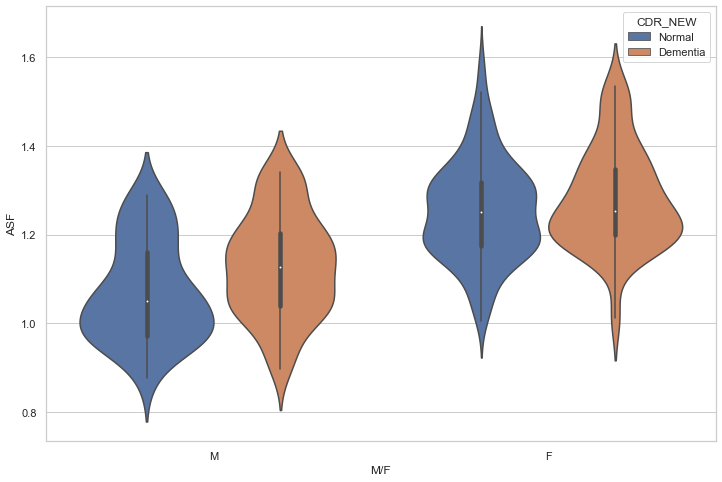

In [30]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="ASF",hue="CDR_NEW", data=df)
plt.show()

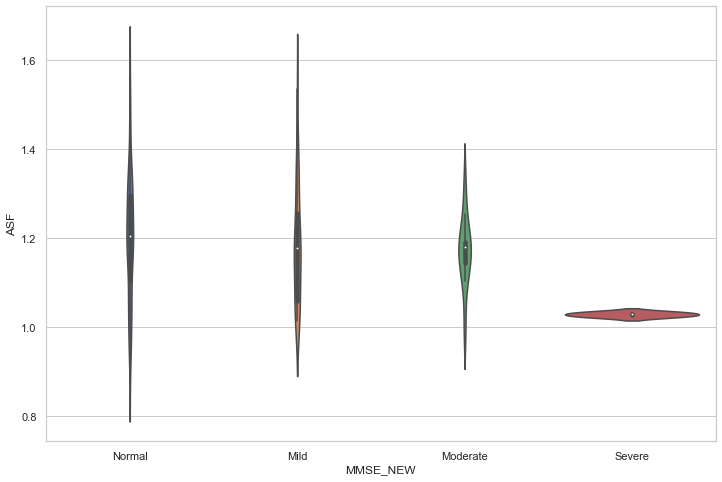

In [31]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE_NEW", y="ASF", data=df)
plt.show()

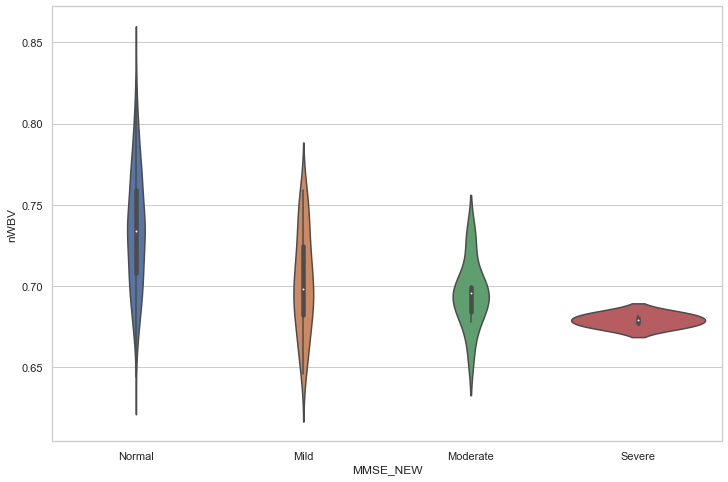

In [32]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE_NEW", y="nWBV", data=df)
plt.show()

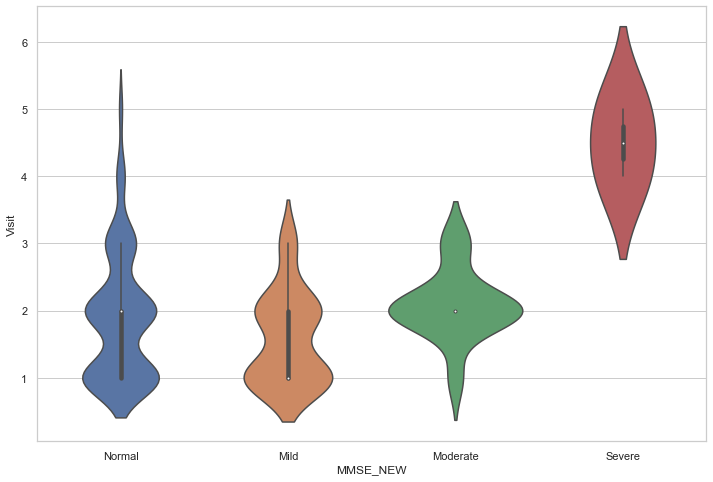

In [33]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE_NEW", y="Visit", data=df)
plt.show()

# Multicollinearity

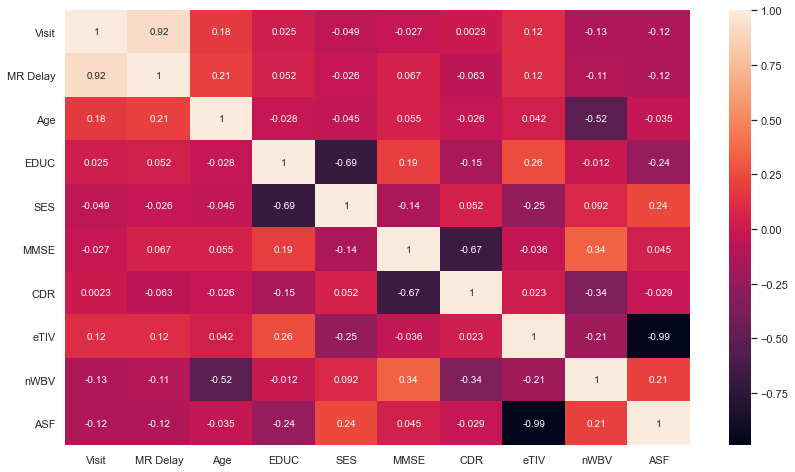

In [34]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Key Insights:

**Most of the cases of dementia observed in the age group of 70 - 80 years of Age.**

**Mens develop dementia at early age before 60 years while womens have tendency of dementia at later age of later than 60 years.**

**Lower values of ASF close to 1 corresponds to severe dementia cases.**

**Severe dementia is diagnosed after minnimum 3 number of visits.**

# Feature Engineering Steps

In [35]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

In [36]:
df['Group'].value_counts()

Nondemented    190
Demented       183
Name: Group, dtype: int64

In [37]:
group_map = {"Demented": 1, "Nondemented": 0}
df['Group'] = df['Group'].map(group_map)

In [38]:
df['Group'].value_counts()

0    190
1    183
Name: Group, dtype: int64

In [39]:
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

# Date preprocessing and building model

In [40]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [44]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

total_fpr = {}
total_tpr = {}
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [45]:
total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

# Importing models

In [46]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report

# Parameter tuning for complex models

In [47]:
model_params = {
    'xgb':{'model': XGBClassifier(n_jobs = -1),
          'params' : {'n_estimators' : [200,400,600,800,1000],
                      'scale_pos_weight' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
        'learning_rate' : [0.001,0.01,0.02, 0.05, 0.1, 0.25],
                      'reg_alpha':[1e-5,1e-2,0.2,0.4,0.6,0.8,1],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.5,0.6,0.7, 0.8,0.9,1.0],
        'colsample_bytree': [0.6,0.7, 0.8,0.9, 1.0],
        'max_depth': [5,6,7,8,9]}
        },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [200,300,400,500,600,700,800,900,1000],
            'bootstrap':[True,False],
            'max_depth':[4,5,6,7,8,9,10],
            'max_features':['auto','sqrt','log2'],
            'min_samples_leaf':[1,2,3,4,5,6,7,8],
            'min_samples_split':[2,5,10],
            'criterion':['gini']
        }
    },
            
}

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'])
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'accuracy': accuracy_score(y_test,clf.predict(X_test))
        
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params','accuracy'])
df2

,model,best_score,best_params,accuracy
0,xgb,0.820029,"{'subsample': 0.9, 'scale_pos_weight': 16, 're...",0.830357
1,random_forest,0.839042,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.830357


In [49]:
df2['best_params']

0    {'subsample': 0.9, 'scale_pos_weight': 16, 're...
1    {'n_estimators': 200, 'min_samples_split': 2, ...
Name: best_params, dtype: object

# Random Forest Classifier



Confusion Matrix:
[[47  5]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        52
           1       0.91      0.82      0.86        60

    accuracy                           0.86       112
   macro avg       0.86      0.86      0.86       112
weighted avg       0.86      0.86      0.86       112



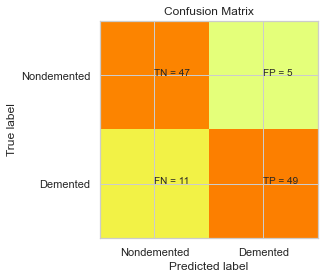

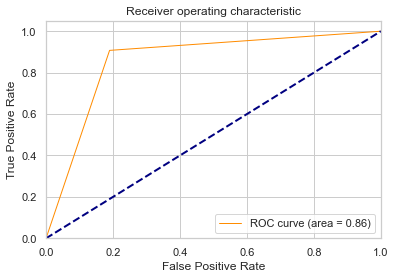


Acuuracy Of the Model:  0.8571428571428571 




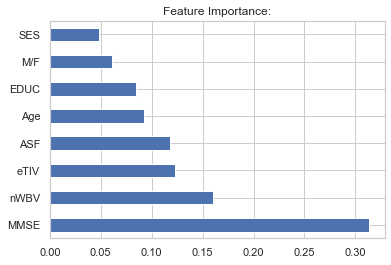

In [50]:
rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=200)
rfc.fit(X_train, y_train.ravel())

report_performance(rfc) 
roc_curves(rfc)
accuracy(rfc)

feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()

# SVM



Confusion Matrix:
[[44  8]
 [18 42]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        52
           1       0.84      0.70      0.76        60

    accuracy                           0.77       112
   macro avg       0.77      0.77      0.77       112
weighted avg       0.78      0.77      0.77       112



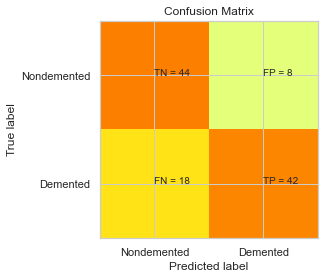

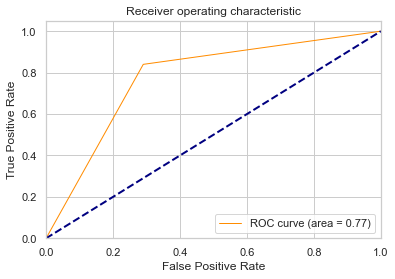


Acuuracy Of the Model:  0.7678571428571429 




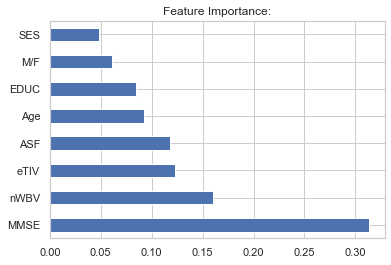

In [51]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)

feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()

# Decision Tree Classifier



Confusion Matrix:
[[41 11]
 [16 44]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        52
           1       0.80      0.73      0.77        60

    accuracy                           0.76       112
   macro avg       0.76      0.76      0.76       112
weighted avg       0.76      0.76      0.76       112



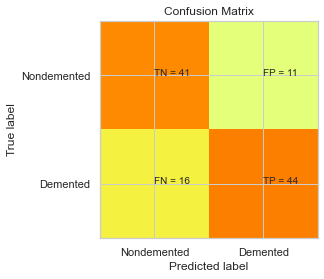

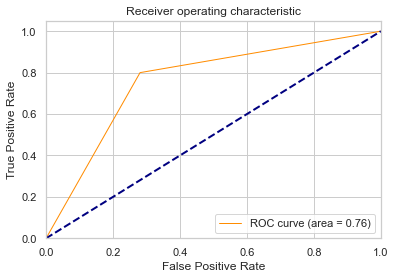


Acuuracy Of the Model:  0.7589285714285714 




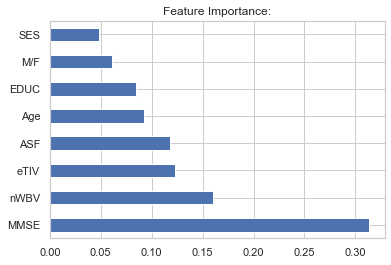

In [52]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)

feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()

# XG Boost Classifier



Confusion Matrix:
[[44  8]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.86      0.83      0.85        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



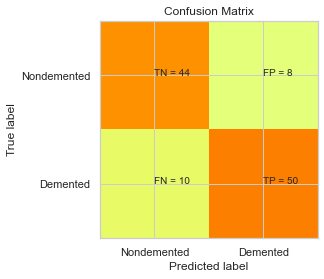

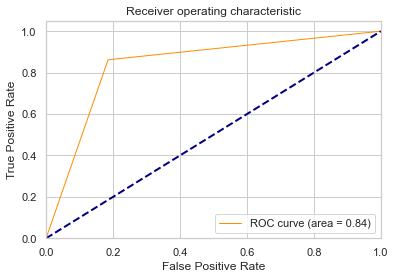


Acuuracy Of the Model:  0.8392857142857143 




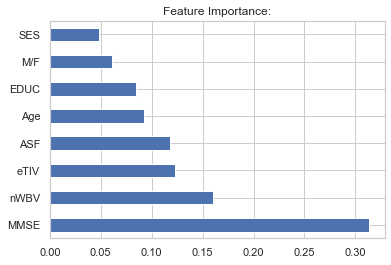

In [53]:
clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance(clf_xgb) 
roc_curves(clf_xgb)
accuracy(clf_xgb)


feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()

# Extra Tree Classifier



Confusion Matrix:
[[47  5]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        52
           1       0.91      0.83      0.87        60

    accuracy                           0.87       112
   macro avg       0.87      0.87      0.87       112
weighted avg       0.87      0.87      0.87       112



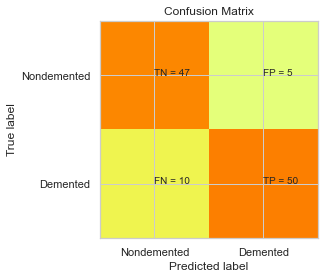

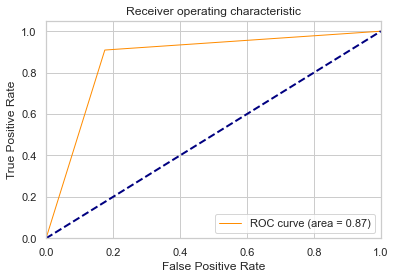


Acuuracy Of the Model:  0.8660714285714286 




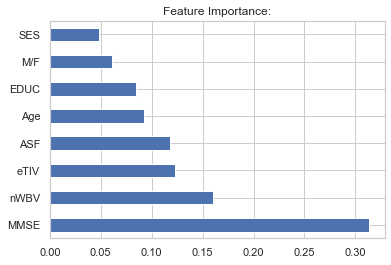

In [54]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train.ravel())
report_performance(etc) 
roc_curves(etc)
accuracy(etc)

feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()

# Gradient Boost Classifier



Confusion Matrix:
[[44  8]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.86      0.83      0.85        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



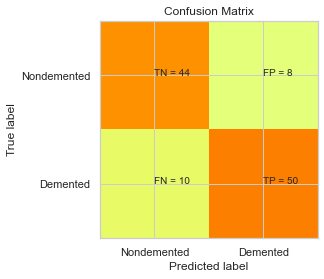

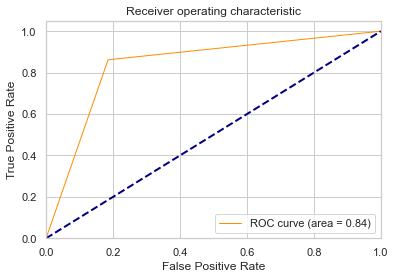


Acuuracy Of the Model:  0.8392857142857143 




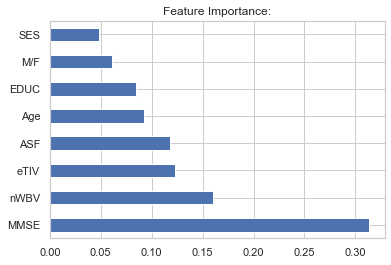

In [55]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train.ravel())
report_performance(gbc) 
roc_curves(gbc)
accuracy(gbc)

feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()

# Adaboost Classifier



Confusion Matrix:
[[40 12]
 [13 47]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        52
           1       0.80      0.78      0.79        60

    accuracy                           0.78       112
   macro avg       0.78      0.78      0.78       112
weighted avg       0.78      0.78      0.78       112



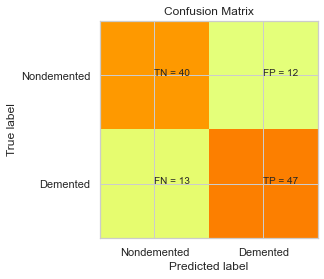

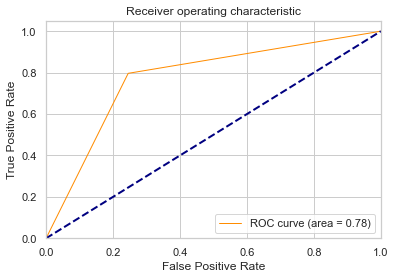


Acuuracy Of the Model:  0.7767857142857143 




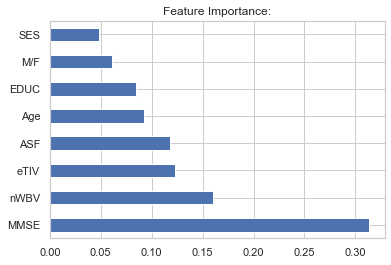

In [56]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train.ravel())
report_performance(abc) 
roc_curves(abc)
accuracy(abc)

feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()

# ROC

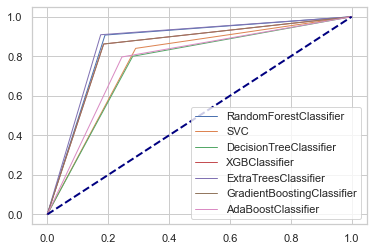

In [57]:
for i in total_fpr.keys():
    plt.plot(total_fpr[i],total_tpr[i],lw=1, label=i)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()